In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
e = eval.evaluation(df_path= '826_2_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_enr

1280 features were identified


,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.391598,9.274154,6.351880e-238
1,0.990,0.300437,7.255346,7.371892e-308
2,0.985,0.246498,5.756511,2.103365e-301
3,0.980,0.211043,4.994257,2.341990e-302
4,0.975,0.185604,4.336862,3.947812e-282
5,0.970,0.165503,3.904244,1.853222e-268
6,0.965,0.149951,3.606181,4.331300e-260
7,0.960,0.136790,3.346613,3.827078e-248


In [3]:
res_pre = e.eval(con, operation = 'precision_recall')
res_pre

,k,precision,recall
0,5.0,0.115789,0.002949
1,10.0,0.094737,0.004766
2,15.0,0.084211,0.006337
3,20.0,0.081579,0.007769
4,25.0,0.075789,0.008513


In [19]:
hit_ls = e.eval(con, operation = 'hit@k')

running hit@k


In [10]:
res = pd.concat([res_enr, res_pre], ignore_index=False, axis=1)
res.to_csv('826_2_results.csv', index=False)

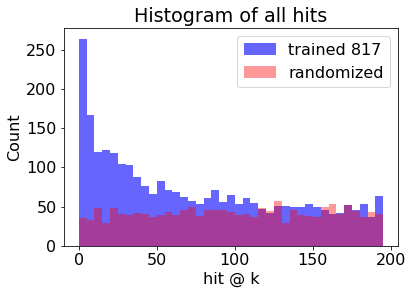

{50: 838, 75: 963, 100: 1051}

In [24]:
# %matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='trained 817')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

hit_ls[2]

In [21]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [22]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

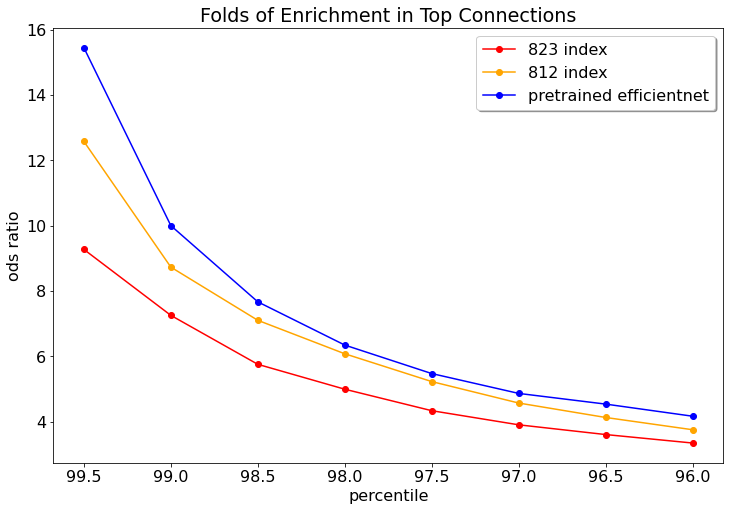

In [25]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '823 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

NameError: name 'efficientnet' is not defined

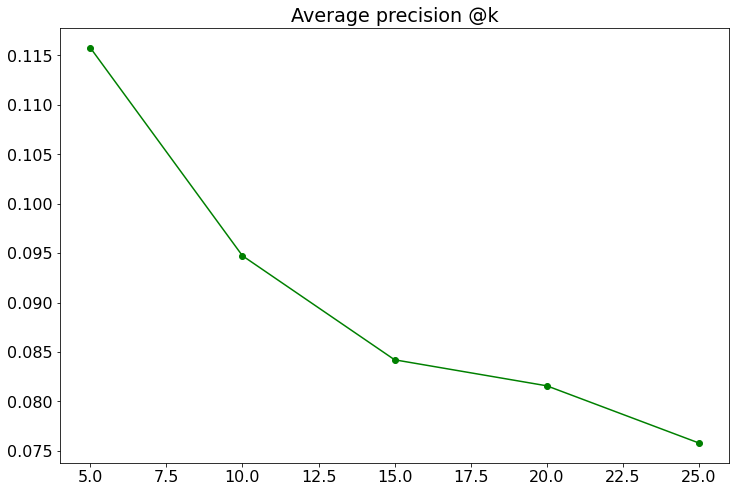

In [9]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res["k"], res["precision"], marker="o", color="green", label = 'cytominer baseline')
plt.plot(efficientnet["k"], efficientnet["precision"], marker="o", color="blue", label = 'efficientnet pretrained')
plt.plot(trained_811["k"], trained_811["precision"], marker="o", color="red", label = 'trained 10 epochs')
plt.plot(trained_813["k"], trained_813["precision"], marker="o", color="orange", label = 'trained 24 epochs')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()
